## Goal

### 1. Clean the Data (C)
- **Load dataset** (`load_df`)
- **Check data shape** (`Shape`)
- **Identify and handle missing values** (`Missing Values`)
- **Remove duplicates and fix inconsistencies**

### 2. Transform the Data (T)
- **Analyze distributions** (`Distributions`)
- **Check for skewness & apply transformations** (`Skewness & Transformations`)
- **Normalize or standardize if needed**

### 3. Feature Engineering (F)
- **Create new features** (e.g., polynomial features, interactions)
- **Refine features** (`refined_load_df`)
- **Assess feature importance** (`Feature Importance`)
- **Drop irrelevant or redundant features**

### 4. Encode & Prepare for Modeling (E)
- **Encode categorical variables** (`One-hot encoding & Label encoding`)
- **Create final dataset** (`training_load_df`)
- **Perform train-test split & scaling (if needed)**


## 1. Clean the Data (C)
- **Load dataset** (`load_df`)
- **Check data shape** (`Shape`)
- **Identify and handle missing values** (`Missing Values`)
- **Remove duplicates and fix inconsistencies**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import boxcox
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



/Users/vijaypatha/Developer/ML_LLM/Regression/BankChurners/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")
load_df = pd.read_csv(path + "/BankChurners.csv") 
load_df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [3]:
# Shape of the dataset
print(f"Total rows and columns in the dataset: {load_df.shape} \n")
print(f"Basic Information about dataset: {load_df.info()} \n")

Total rows and columns in the dataset: (10127, 23) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                      

In [4]:
load_df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
load_df["CLIENTNUM"]

0        768805383
1        818770008
2        713982108
3        769911858
4        709106358
           ...    
10122    772366833
10123    710638233
10124    716506083
10125    717406983
10126    714337233
Name: CLIENTNUM, Length: 10127, dtype: int64

In [5]:
# Dropping 3 numerical columns 
load_df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","CLIENTNUM"], inplace=True)

In [6]:
# Checking for missing values in percentage
missing_percentage = load_df.isnull().sum() / len(load_df) * 100
print(missing_percentage)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [7]:
# Duplicate rows in the dataset
duplicate_rows = load_df.duplicated().sum()
print(f"Duplicate rows in the dataset: {duplicate_rows}")

Duplicate rows in the dataset: 0


In [8]:
load_df["Education_Level"].replace("Unknown", load_df["Education_Level"].mode()[0], inplace=True)
load_df["Marital_Status"].replace("Unknown", load_df["Marital_Status"].mode()[0], inplace=True)
load_df["Income_Category"].replace("Unknown", load_df["Income_Category"].mode()[0], inplace=True)

/var/folders/tn/bllk4s_n0k9g75m59d6nyp8w0000gn/T/ipykernel_23760/2940039746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  load_df["Education_Level"].replace("Unknown", load_df["Education_Level"].mode()[0], inplace=True)
/var/folders/tn/bllk4s_n0k9g75m59d6nyp8w0000gn/T/ipykernel_23760/2940039746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [9]:
# Getting to know float64(7), int64(10), object(6)
categorical_columns = load_df.select_dtypes(include=('object')).columns
print(f"Categorical columns in the dataset: {categorical_columns} \n")

numerical_columns = load_df.select_dtypes(include=('number')).columns
print(f"Numerical columns in the dataset: {numerical_columns} \n")

Categorical columns in the dataset: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object') 

Numerical columns in the dataset: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object') 



## 2. Transform the Data (T)
- **Analyze distributions** (`Distributions`)
- **Check for skewness & apply transformations** (`Skewness & Transformations`)
- **Normalize or standardize if needed**

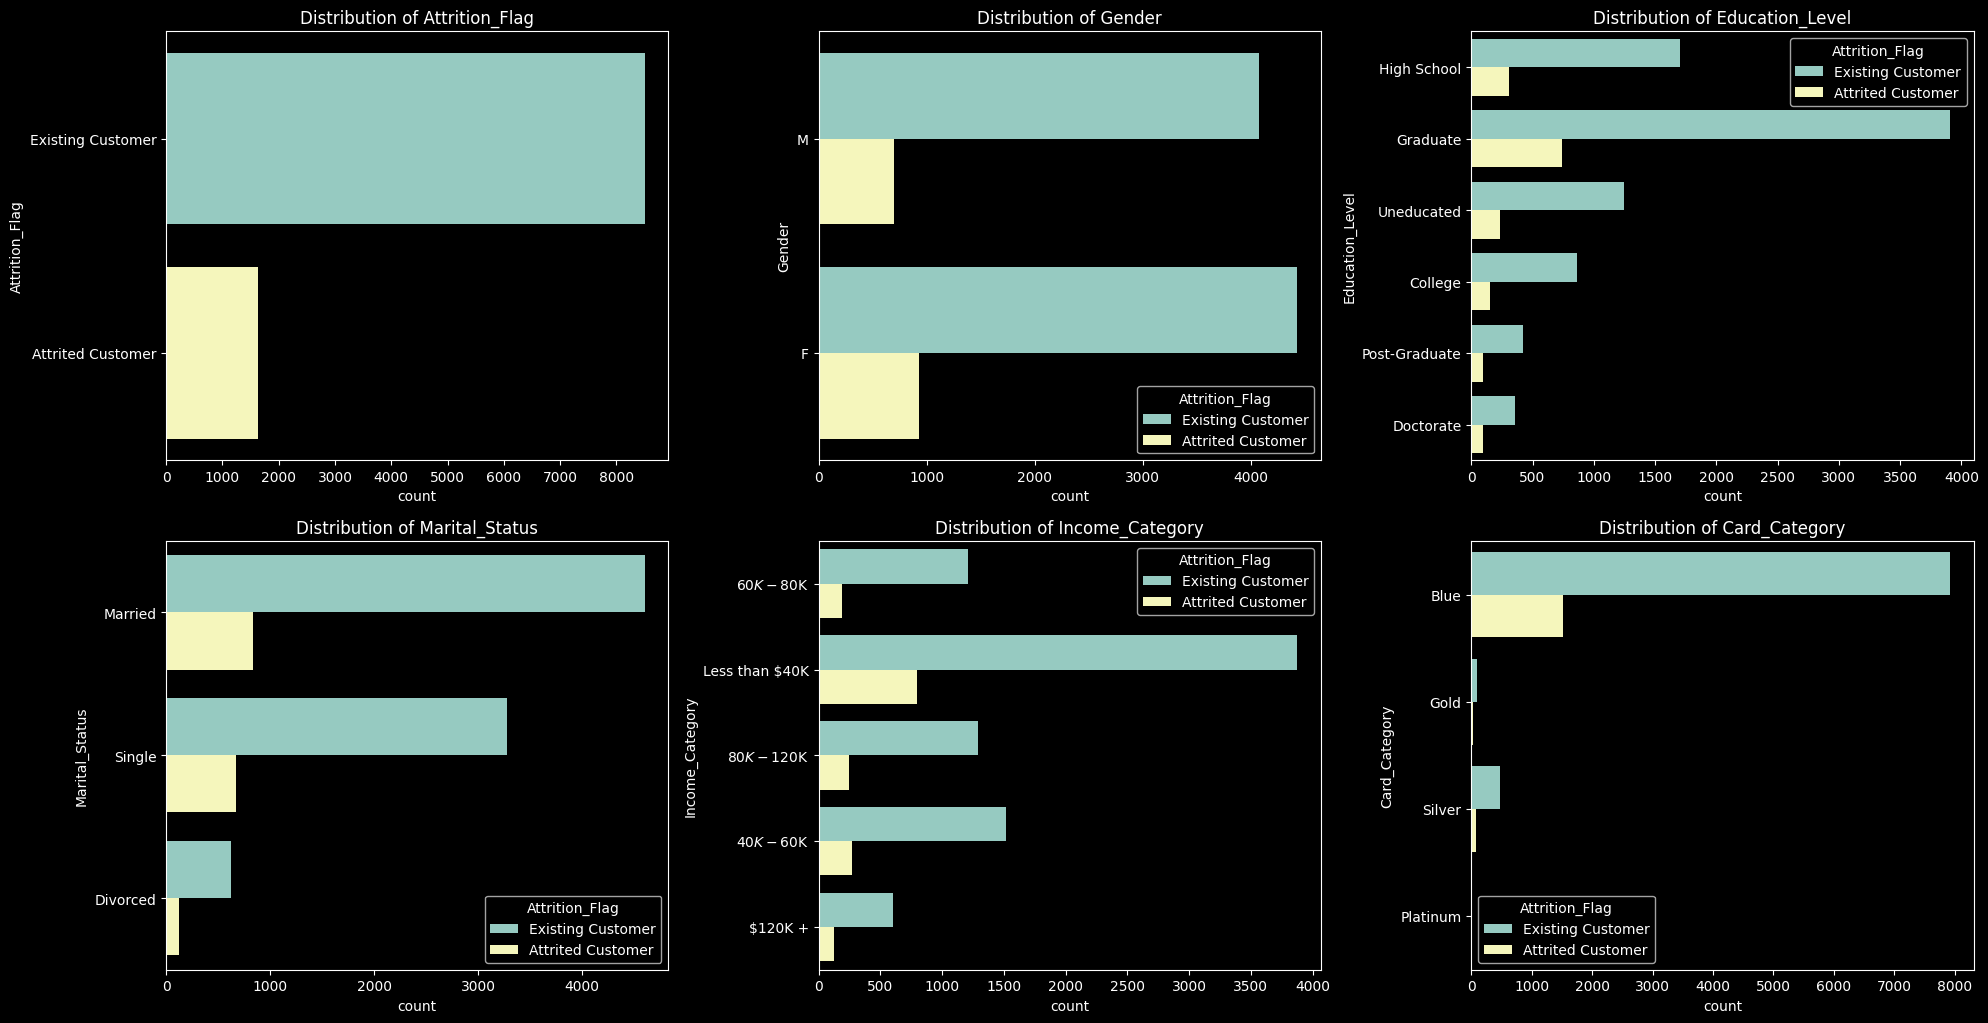

In [10]:
# Plotting Categorical Variables
plt.figure(figsize=(20, 15), facecolor="black")

# Set Matplotlib dark background
plt.style.use("dark_background")

for index, column_name in enumerate(categorical_columns):
    plt.subplot(3, 3, index+1)
    sns.countplot(y=column_name, hue="Attrition_Flag", data=load_df)
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()


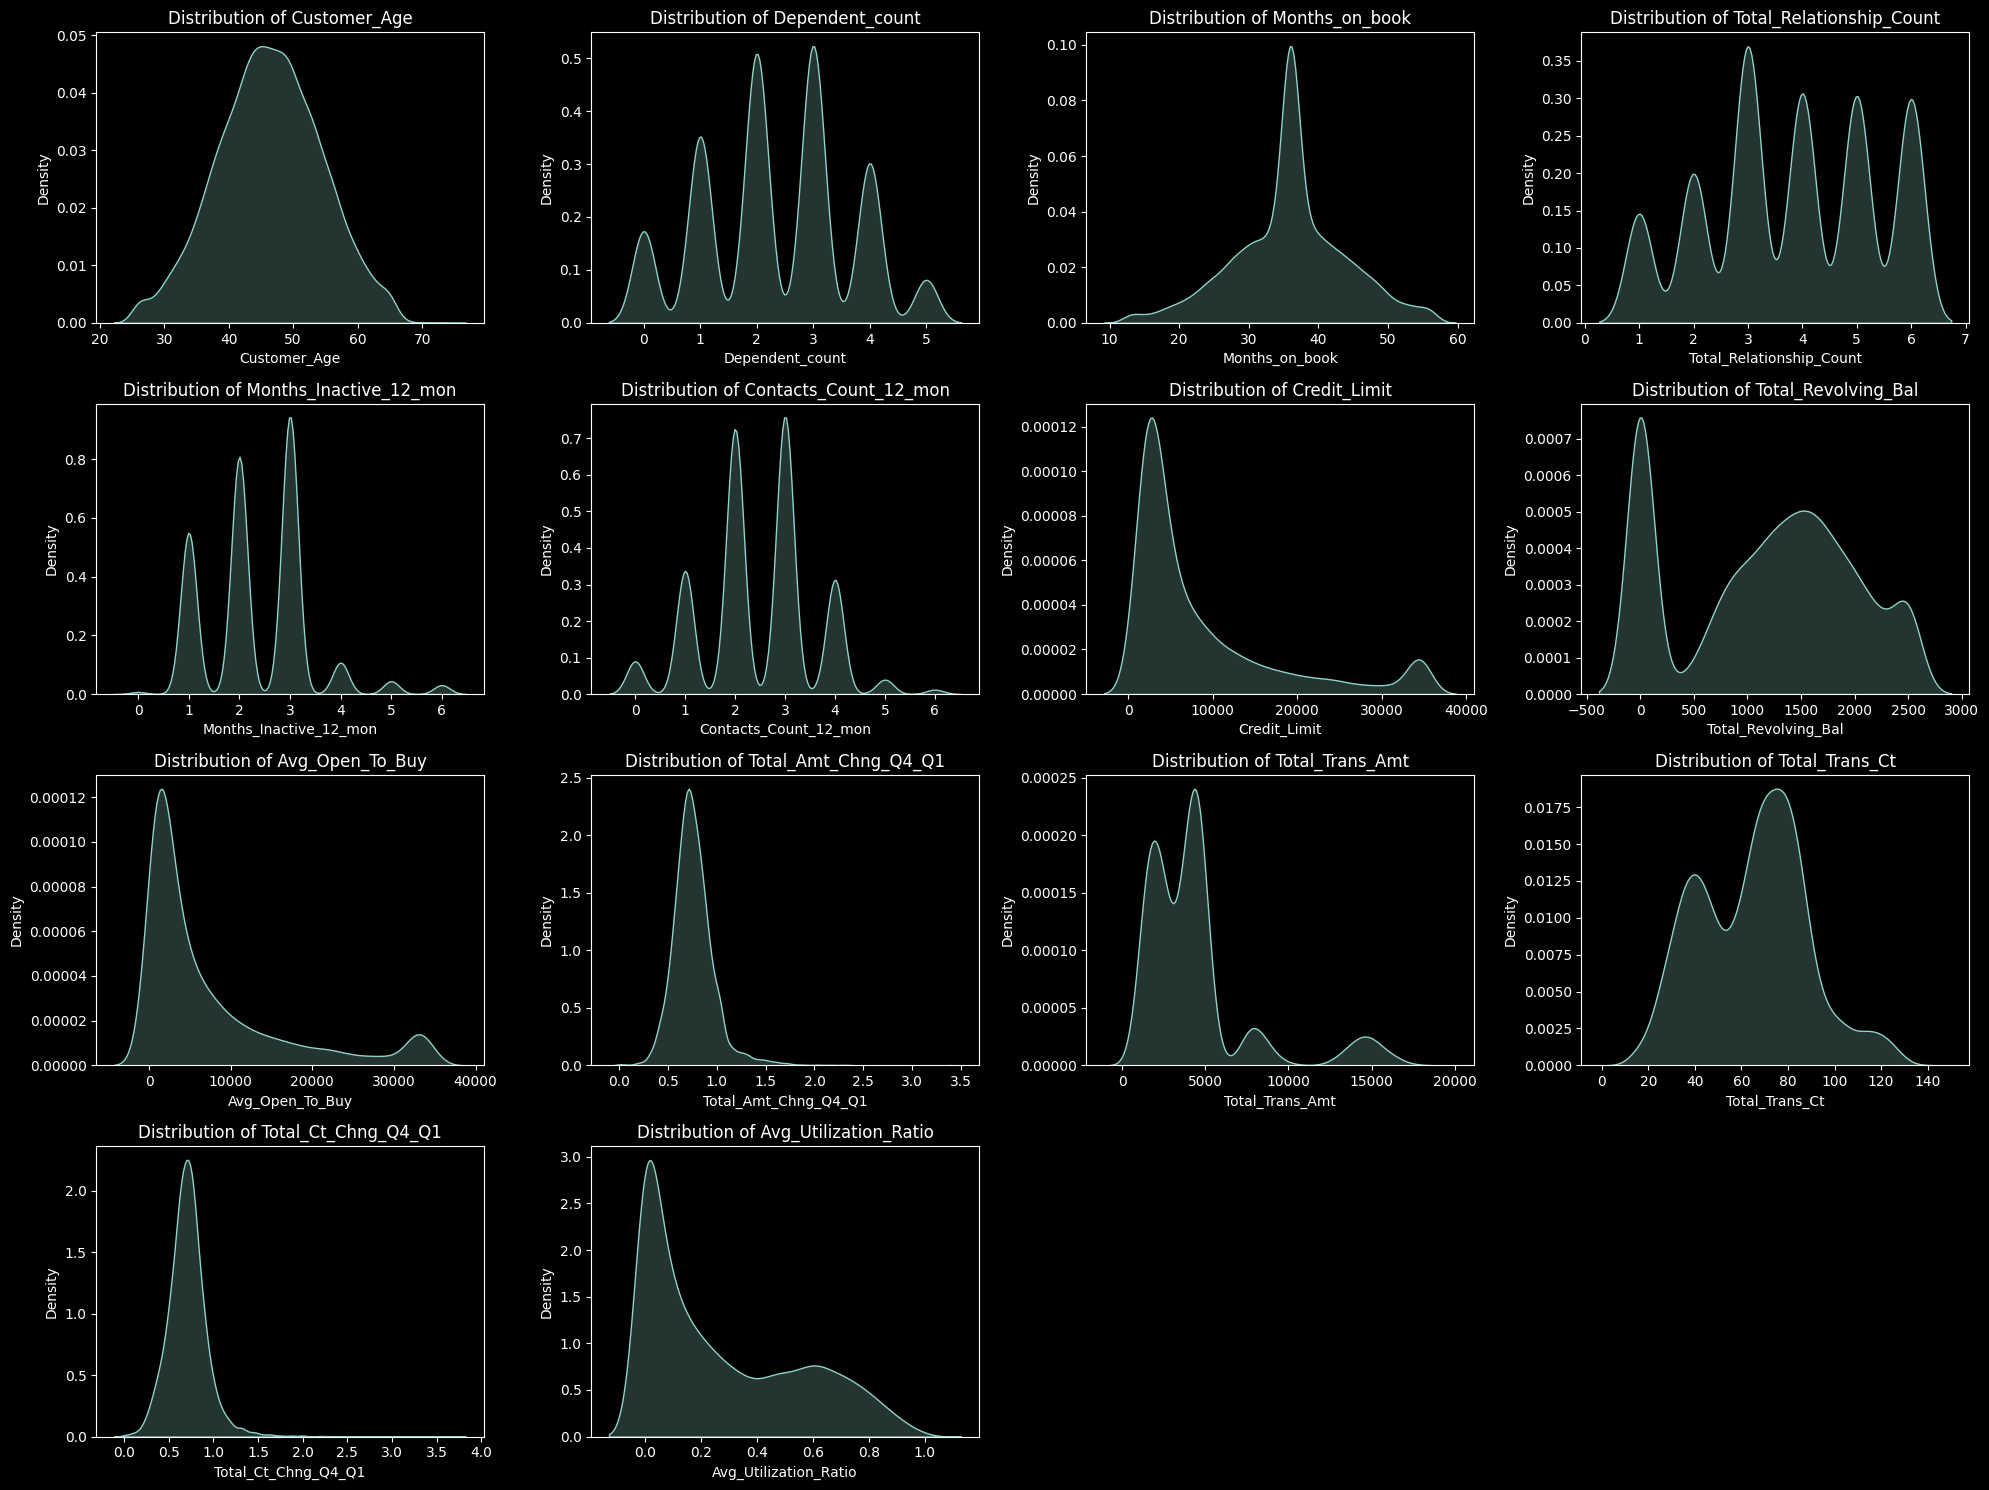

In [11]:
# Plotting Numerical Variables 

plt.figure(figsize=(20,15), facecolor="black")

# Set Matplotlib dark background
plt.style.use("dark_background")

for index, column_name in enumerate(numerical_columns):
    plt.subplot(4,4,index+1)
    sns.kdeplot(data=load_df, x=column_name, fill=True)
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()


In [12]:
sknewness = load_df[numerical_columns].skew()
print(f"Sknewness in the numerical columns:\n{sknewness} \n")
print(f"What Object Types is sknewness: {type(sknewness)}")
#any features with snewness > 0.5 are generally considered as skewed and need transformations

Sknewness in the numerical columns:
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64 

What Object Types is sknewness: <class 'pandas.core.series.Series'>


In [13]:
# Select only those features with sknewness > 0.5
high_skew_feature_names = sknewness[sknewness > 0.5].index
print(f"List of features names with sknewness > 0.5: {high_skew_feature_names}")

List of features names with sknewness > 0.5: Index(['Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')


In [14]:
# Apply transformations

for feature in high_skew_feature_names:
    
    # Log transform
    load_df[feature + '_Log'] = np.log1p(load_df[feature])

    # Box-Cox (handling potential non-positive values)
    if (load_df[feature] <= 0).any():
        load_df[feature + '_BoxCox'], _ = boxcox(load_df[feature] + 1)
    else:
        load_df[feature + '_BoxCox'], _ = boxcox(load_df[feature])

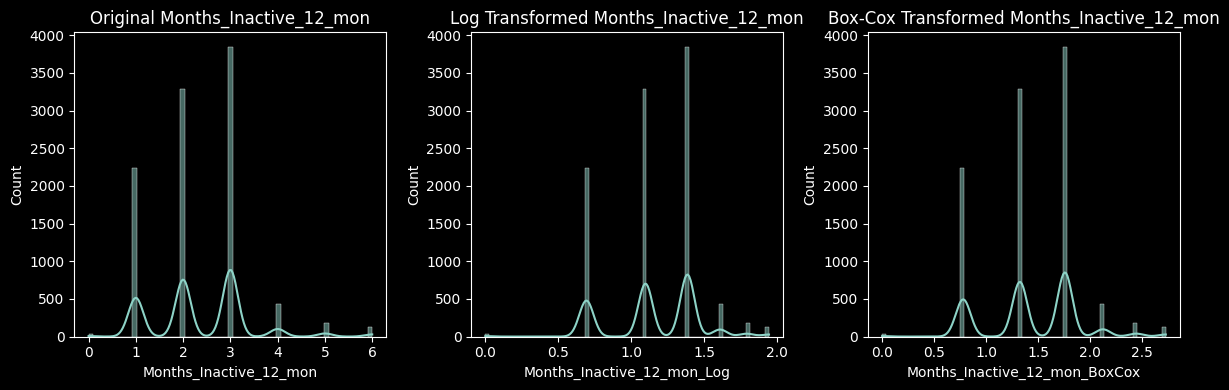

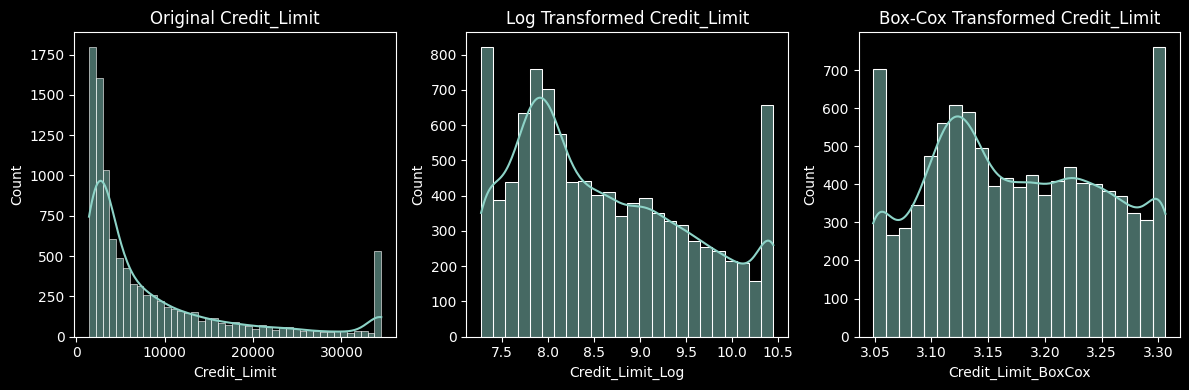

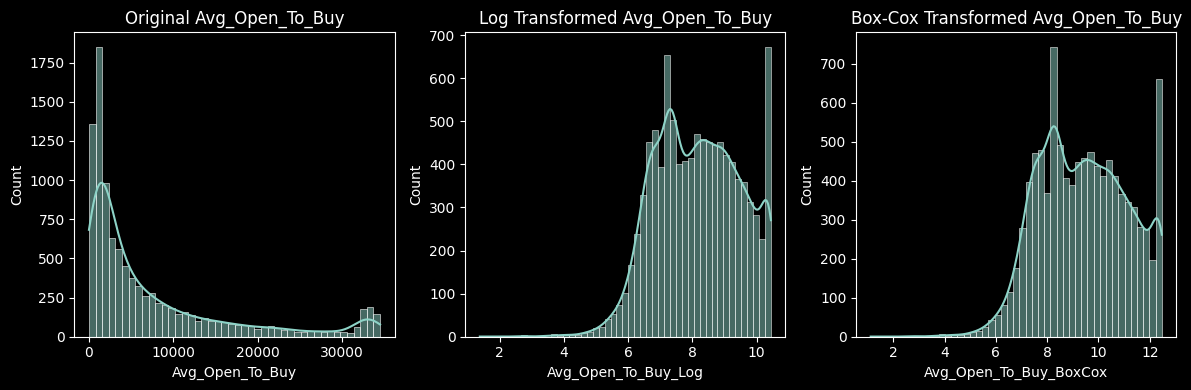

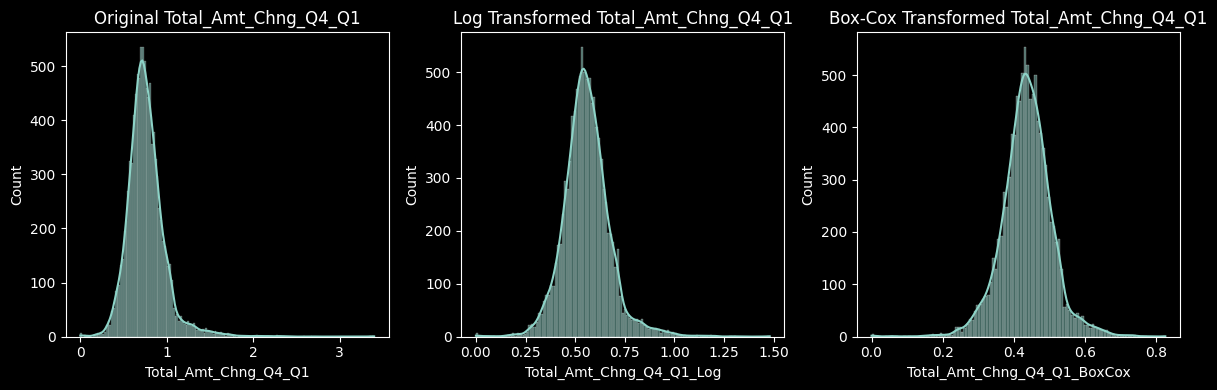

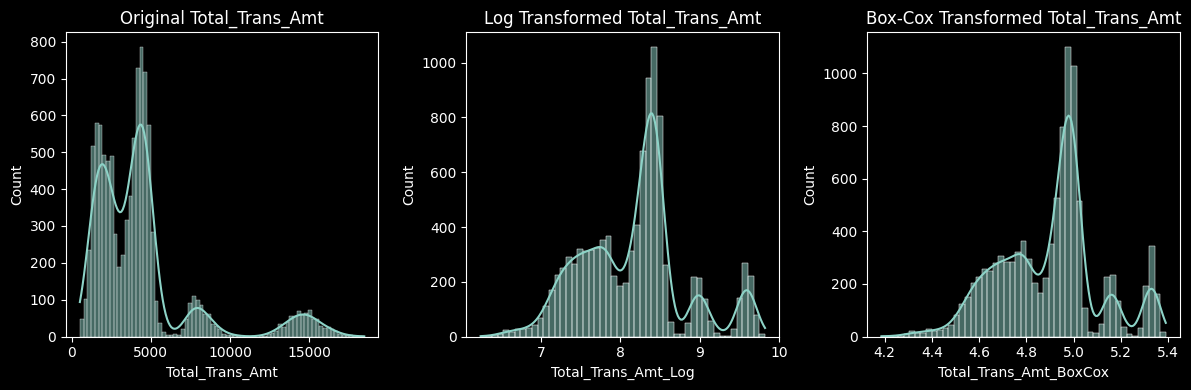

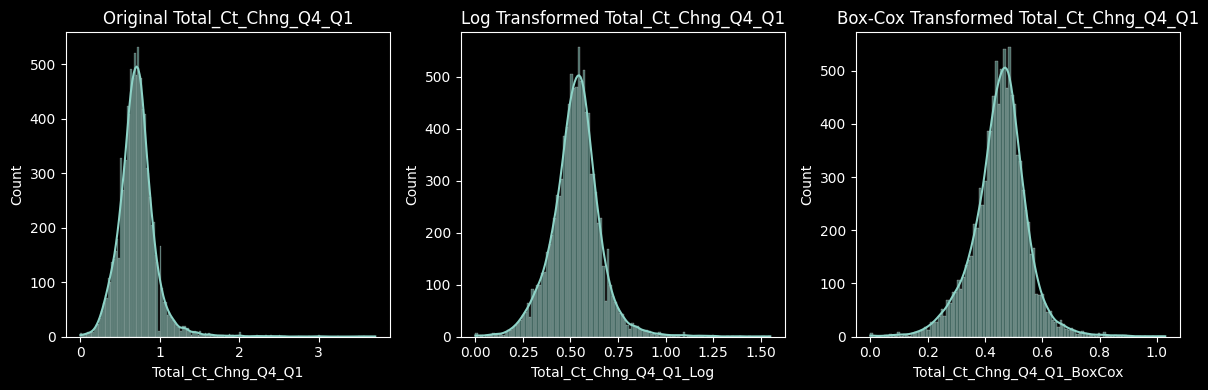

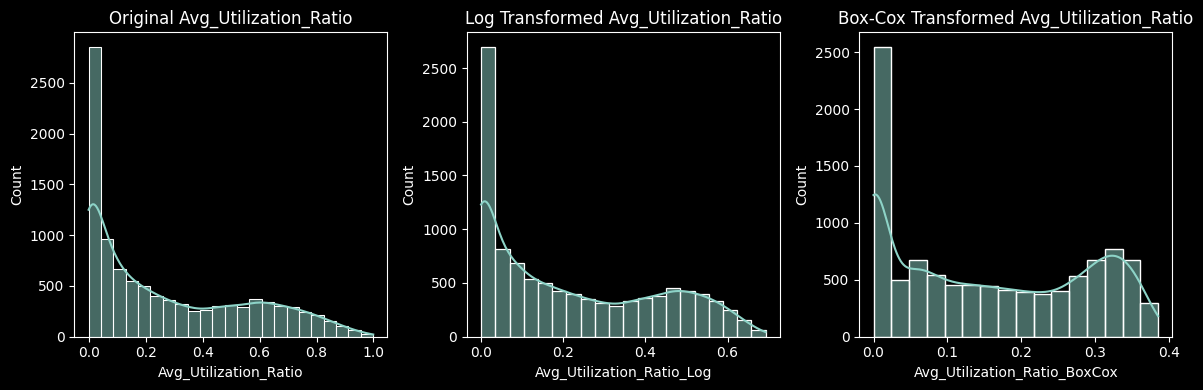

In [15]:
# Visualize the transformations
for feature in high_skew_feature_names:
    plt.figure(figsize=(12, 4), facecolor="black")

    # Original Distribution
    plt.subplot(1, 3, 1)
    sns.histplot(load_df[feature], kde=True)
    plt.title(f'Original {feature}')

    # Log Transformed Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(load_df[feature + '_Log'], kde=True)
    plt.title(f'Log Transformed {feature}')

    # Box-Cox Transformed Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(load_df[feature + '_BoxCox'], kde=True)
    plt.title(f'Box-Cox Transformed {feature}')

    plt.tight_layout()
    plt.show()

In [16]:
#  standardize big count and curves
standardize_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Contacts_Count_12_mon', 
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
    'Total_Trans_Ct', 'Months_Inactive_12_mon_Log', 
    'Months_Inactive_12_mon_BoxCox', 'Credit_Limit_Log', 
    'Credit_Limit_BoxCox', 'Avg_Open_To_Buy_Log', 
    'Avg_Open_To_Buy_BoxCox'
]

# normalize ratios and ranges
normalize_columns = [
    'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio', 'Total_Trans_Amt', 
    'Total_Amt_Chng_Q4_Q1_Log', 'Total_Amt_Chng_Q4_Q1_BoxCox', 
    'Total_Trans_Amt_Log', 'Total_Trans_Amt_BoxCox', 
    'Total_Ct_Chng_Q4_Q1_Log', 'Total_Ct_Chng_Q4_Q1_BoxCox', 
    'Avg_Utilization_Ratio_Log', 'Avg_Utilization_Ratio_BoxCox'
]


# Copy the original DataFrame
final_df = load_df.copy()

# Standardize specific columns
scaler_standard = StandardScaler()
final_df[standardize_columns] = scaler_standard.fit_transform(final_df[standardize_columns])

# Normalize specific columns
scaler_minmax = MinMaxScaler()
final_df[normalize_columns] = scaler_minmax.fit_transform(final_df[normalize_columns])

In [17]:
final_df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy_Log,Avg_Open_To_Buy_BoxCox,Total_Amt_Chng_Q4_Q1_Log,Total_Amt_Chng_Q4_Q1_BoxCox,Total_Trans_Amt_Log,Total_Trans_Amt_BoxCox,Total_Ct_Chng_Q4_Q1_Log,Total_Ct_Chng_Q4_Q1_BoxCox,Avg_Utilization_Ratio_Log,Avg_Utilization_Ratio_BoxCox
0,Existing Customer,-0.165406,M,0.503368,High School,Married,$60K - $80K,Blue,0.384621,0.763943,...,0.931878,0.930011,0.572624,0.722721,0.224836,0.269847,0.622417,0.721114,0.085486,0.145198
1,Existing Customer,0.333570,F,2.043199,Graduate,Single,Less than $40K,Blue,1.010715,1.407306,...,0.567630,0.553664,0.629714,0.769329,0.258497,0.307708,1.000000,1.000000,0.144150,0.235823
2,Existing Customer,0.583058,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.008965,0.120579,...,-0.020938,-0.042171,0.863830,0.927848,0.364208,0.422582,0.776423,0.846201,0.000000,0.000000


## 3. Feature Engineering (F)
Add new features, drop irrelevant ones, check importance

In [18]:
# Customer Behavior Features
final_df['Account_Tenure_Years'] = final_df['Months_on_book'] / 12
final_df['Activity_Ratio'] = final_df['Total_Trans_Ct'] / final_df['Months_on_book']
final_df['Inactivity_Ratio'] = final_df['Months_Inactive_12_mon'] / final_df['Months_on_book']
final_df['Contact_Frequency'] = final_df['Contacts_Count_12_mon'] / final_df['Months_on_book']

# Credit Utilization Features
final_df['Credit_Utilization_Percentage'] = final_df['Total_Revolving_Bal'] / final_df['Credit_Limit']
final_df['Unused_Credit_Percentage'] = final_df['Avg_Open_To_Buy'] / final_df['Credit_Limit']
final_df['Revolving_Balance_Ratio'] = final_df['Total_Revolving_Bal'] / (final_df['Avg_Open_To_Buy'] + 1e-9)  # Avoid division by zero

# Transaction Features
final_df['Avg_Transaction_Amt'] = final_df['Total_Trans_Amt'] / (final_df['Total_Trans_Ct'] + 1e-9)  # Avoid division by zero
final_df['Transaction_Change_Ratio'] = final_df['Total_Ct_Chng_Q4_Q1'] / (final_df['Total_Trans_Ct'] + 1e-9)  # Avoid division by zero
final_df['Spending_Change_Ratio'] = final_df['Total_Amt_Chng_Q4_Q1'] / (final_df['Total_Trans_Amt'] + 1e-9)  # Avoid division by zero

# Customer Demographics Features
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
final_df['Age_Group'] = pd.cut(final_df['Customer_Age'], bins=bins, labels=labels)

final_df['Dependent_Ratio'] = final_df['Dependent_count'] / (final_df['Customer_Age'] + 1e-9)  # Avoid division by zero

# Risk or Loyalty Features
final_df['Loyalty_Score'] = (final_df['Months_on_book'] * final_df['Total_Trans_Ct']) / (final_df['Months_Inactive_12_mon'] + 1)
final_df['Risk_Score'] = final_df['Credit_Utilization_Percentage'] * final_df['Months_Inactive_12_mon']
final_df['Transaction_to_Tenure_Ratio'] = final_df['Total_Trans_Ct'] / (final_df['Months_on_book'])
final_df['Spending_to_Limit_Ratio'] = final_df['Total_Trans_Amt'] / (final_df['Credit_Limit'])

### 3.A Feature Importance: Correlation matrix

In [19]:
final_df = pd.get_dummies(final_df, columns=['Gender', 'Marital_Status', 'Card_Category', 'Dependent_count','Age_Group', 'Income_Category','Education_Level'], drop_first=True)

In [20]:
final_df.head(3)

,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Age_Group_60+,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated
0,Existing Customer,-0.165406,0.384621,0.763943,1,0.492404,0.446622,-0.473422,0.488971,0.392994,...,False,False,True,False,False,False,False,True,False,False
1,Existing Customer,0.333570,1.010715,1.407306,1,-0.411616,-0.041367,-0.366667,-0.008486,0.453636,...,False,False,False,False,True,False,True,False,False,False
2,Existing Customer,0.583058,0.008965,0.120579,1,-2.219655,-0.573698,-1.426858,-0.445658,0.763615,...,False,False,False,True,False,False,True,False,False,False


In [21]:
# Lable encode feature Variable
label_encoder = LabelEncoder()
final_df['Attrition_Flag'] = label_encoder.fit_transform(final_df['Attrition_Flag'])
final_df.head(3) # Now 'Attrition_Flag' will be 0 and 1

,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Age_Group_60+,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated
0,1,-0.165406,0.384621,0.763943,1,0.492404,0.446622,-0.473422,0.488971,0.392994,...,False,False,True,False,False,False,False,True,False,False
1,1,0.333570,1.010715,1.407306,1,-0.411616,-0.041367,-0.366667,-0.008486,0.453636,...,False,False,False,False,True,False,True,False,False,False
2,1,0.583058,0.008965,0.120579,1,-2.219655,-0.573698,-1.426858,-0.445658,0.763615,...,False,False,False,True,False,False,True,False,False,False


In [22]:
final_df.head(3)

,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Age_Group_60+,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated
0,1,-0.165406,0.384621,0.763943,1,0.492404,0.446622,-0.473422,0.488971,0.392994,...,False,False,True,False,False,False,False,True,False,False
1,1,0.333570,1.010715,1.407306,1,-0.411616,-0.041367,-0.366667,-0.008486,0.453636,...,False,False,False,False,True,False,True,False,False,False
2,1,0.583058,0.008965,0.120579,1,-2.219655,-0.573698,-1.426858,-0.445658,0.763615,...,False,False,False,True,False,False,True,False,False,False


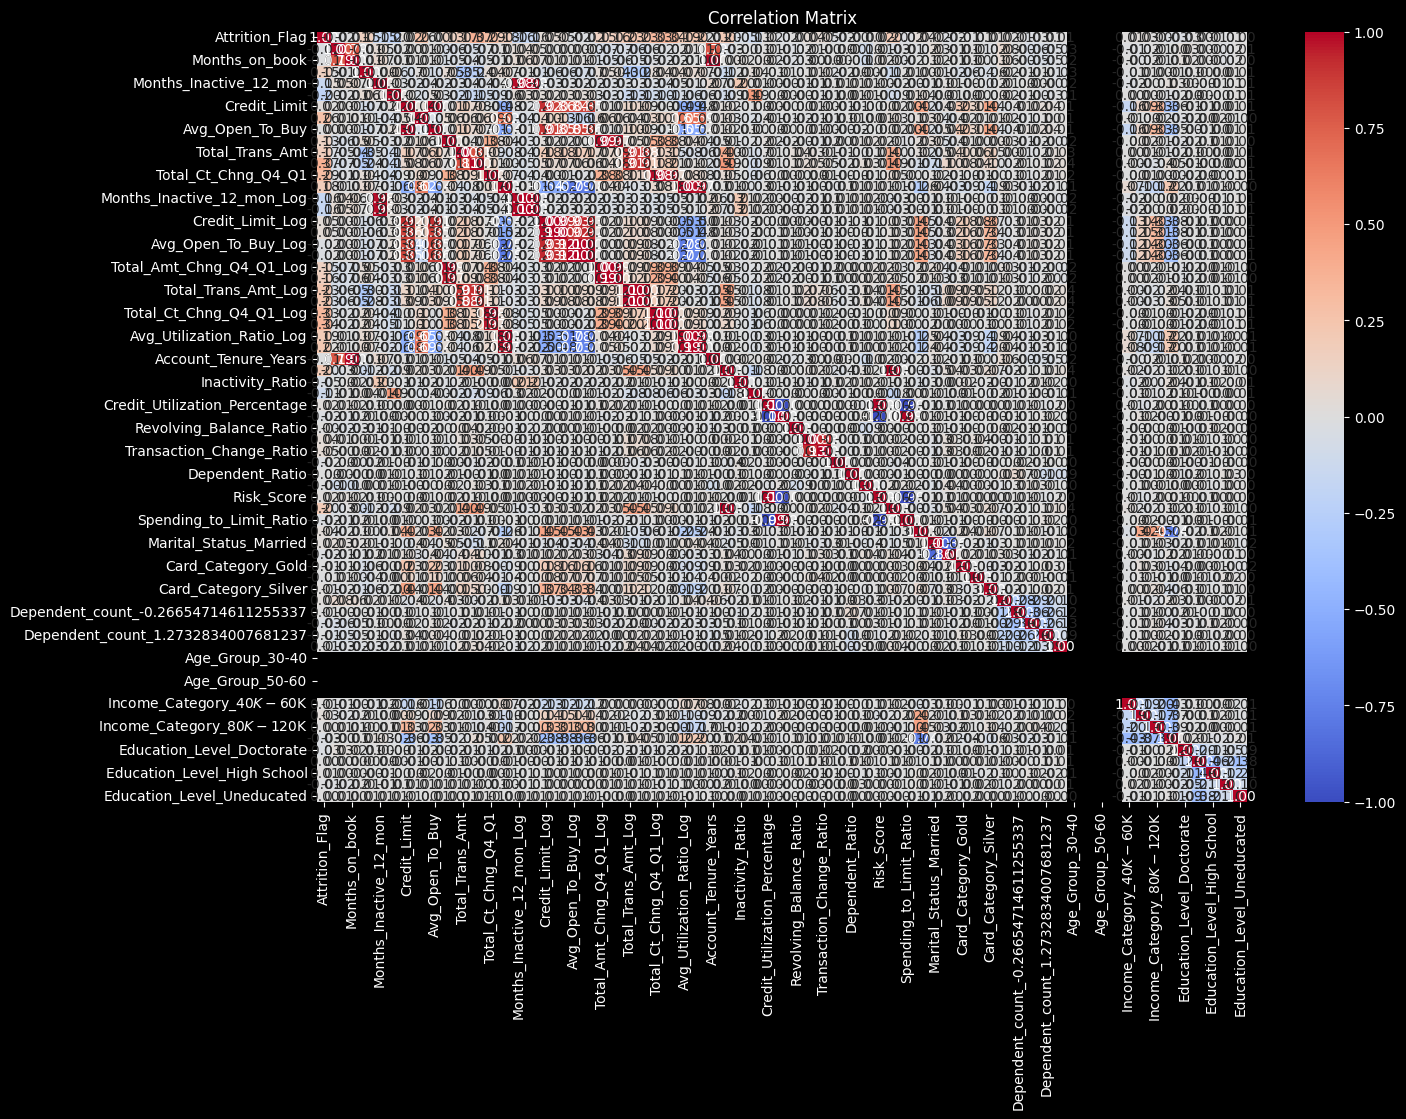

In [23]:
# Feature Selection: Correlation Matrix
correlation_matrix = final_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Define a threshold for important correlations
threshold = 0.2  

# Get correlations with the target variable
target_correlations = correlation_matrix['Attrition_Flag'].sort_values(ascending=False)

# Filter correlations based on threshold
important_correlations = target_correlations[abs(target_correlations) > threshold]

# Print only important correlations
print(important_correlations)

Attrition_Flag                  1.000000
Total_Trans_Ct                  0.371403
Total_Ct_Chng_Q4_Q1_BoxCox      0.344669
Total_Ct_Chng_Q4_Q1_Log         0.328089
Total_Ct_Chng_Q4_Q1             0.290054
Total_Revolving_Bal             0.263053
Total_Trans_Amt_BoxCox          0.232896
Total_Trans_Amt_Log             0.226975
Avg_Utilization_Ratio_BoxCox    0.222856
Contacts_Count_12_mon          -0.204491
Name: Attrition_Flag, dtype: float64


In [25]:
# Feature Selection: Recursive Feature Elimination
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Define features (X) and target (y)
X = final_df.drop(columns=['Attrition_Flag'])  # Feature set
y = final_df['Attrition_Flag']  # Target variable

# Initialize the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the model and desired number of features to select
num_features_to_select = 10  # Adjust as needed
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Trans_Amt_Log', 'Total_Trans_Amt_BoxCox',
       'Total_Ct_Chng_Q4_Q1_BoxCox', 'Avg_Transaction_Amt',
       'Transaction_Change_Ratio', 'Spending_Change_Ratio'],
      dtype='object')


In [26]:
# Feature Selection: Tree-Based Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Sample Data
X = final_df.drop(columns=['Attrition_Flag'])  # Features
y = final_df['Attrition_Flag']  # Target

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Select important features (threshold can be adjusted)
important_features = feature_importances[feature_importances > 0.01].sort_values(ascending=False)

# Print important features
print(important_features)

Avg_Transaction_Amt             0.072854
Spending_Change_Ratio           0.072771
Total_Trans_Ct                  0.072479
Total_Trans_Amt_Log             0.059791
Total_Trans_Amt                 0.059189
Transaction_Change_Ratio        0.057622
Total_Trans_Amt_BoxCox          0.049003
Total_Ct_Chng_Q4_Q1             0.046537
Total_Revolving_Bal             0.046046
Total_Relationship_Count        0.038258
Total_Ct_Chng_Q4_Q1_Log         0.036295
Total_Ct_Chng_Q4_Q1_BoxCox      0.031210
Avg_Utilization_Ratio_Log       0.029682
Avg_Utilization_Ratio           0.029663
Avg_Utilization_Ratio_BoxCox    0.019362
Total_Amt_Chng_Q4_Q1_Log        0.017553
Total_Amt_Chng_Q4_Q1            0.016032
Total_Amt_Chng_Q4_Q1_BoxCox     0.015714
Customer_Age                    0.014822
Risk_Score                      0.013344
Revolving_Balance_Ratio         0.012375
Spending_to_Limit_Ratio         0.012213
dtype: float64


In [27]:
def select_important_features(tree_importance, rfe_selected, corr_matrix, target_col, corr_threshold=0.2):
    """
    Selects important features based on:
    1. Tree-Based Feature Importance
    2. Recursive Feature Elimination (RFE)
    3. Correlation with Target Variable
    
    Parameters:
        tree_importance (pd.Series): Feature importance scores from a tree-based model.
        rfe_selected (list): Features selected by Recursive Feature Elimination.
        corr_matrix (pd.Series): Correlation values with target variable.
        target_col (str): Name of the target variable.
        corr_threshold (float): Minimum correlation threshold for feature selection.
    
    Returns:
        tuple: (Highly important features in all 3 methods, Additional strong features in 2 methods)
    """
    # Step 1: Extract important features
    tree_features = set(tree_importance.index)
    rfe_features = set(rfe_selected)
    corr_features = set(corr_matrix[abs(corr_matrix) > corr_threshold].index)
    corr_features.discard(target_col)  # Remove target from feature list
    
    # Step 2: Identify overlapping features
    all_three = tree_features & rfe_features & corr_features  # Features in all 3 methods
    two_methods = (tree_features & rfe_features) | (tree_features & corr_features) | (rfe_features & corr_features)
    two_methods -= all_three  # Exclude features already in all 3

    return list(all_three), list(two_methods)


# Example usage:
tree_importance = important_features  # Tree-based feature importance (Series)
rfe_selected = list(selected_features)  # RFE selected features (List)
corr_matrix = important_correlations  # Correlation matrix (Series)
target_col = "Attrition_Flag"  # Define target column

# Get selected features
highly_important, additional_important = select_important_features(tree_importance, rfe_selected, corr_matrix, target_col)

print("Highly Important Features (All 3 methods):", highly_important)
print("Additional Strong Features (At least 2 methods):", additional_important)

Highly Important Features (All 3 methods): ['Total_Revolving_Bal', 'Total_Trans_Amt_Log', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1_BoxCox', 'Total_Trans_Amt_BoxCox']
Additional Strong Features (At least 2 methods): ['Total_Ct_Chng_Q4_Q1', 'Transaction_Change_Ratio', 'Spending_Change_Ratio', 'Avg_Utilization_Ratio_BoxCox', 'Total_Ct_Chng_Q4_Q1_Log', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Avg_Transaction_Amt']


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the final feature set (intersection of all three methods)
selected_features = [
   'Total_Revolving_Bal', 'Total_Trans_Amt_Log', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1_BoxCox', 'Total_Trans_Amt_BoxCox', 'Total_Ct_Chng_Q4_Q1', 'Transaction_Change_Ratio', 'Spending_Change_Ratio', 'Avg_Utilization_Ratio_BoxCox', 'Total_Ct_Chng_Q4_Q1_Log', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Avg_Transaction_Amt'
]


# Create X (features) and y (target)
X = final_df[selected_features]
y = final_df['Attrition_Flag']  # Target variable

# Split data into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       325
           1       0.97      0.98      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.93      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026

